# Computation of historic metrics for Europe
Save the input data (temperature and soil moisture) in the following directory: sequential_heat_crop_impacts/climate_pre-processing/data/input/

In [1]:
import os
import sys
import pathlib
from pathlib import Path
import xarray as xr
dir_preprocessing = os.path.join(str(pathlib.Path().resolve()))
sys.path.append(dir_preprocessing)
import historic_metric as fct_his

dir_data = os.path.join(dir_preprocessing, 'data')

In [2]:
dir_data

'/Users/carmenst/Documents/CLIMADA/own_projects/sequential_heat_crop_impacts/climate_preprocessing/data'

## Specification of variables and data paths 

In [3]:
data_t = Path(os.path.join(dir_data, 'input', 'CPC'))
data_m = Path(os.path.join(dir_data, 'input', 'SMroot_1980-2021_GLEAM_v3.6a_daily_remap05.nc'))

Define the months of interest and the latitude and longitude bounds for the study region. The crops dictionary contains the different months and thresholds considered for the respective crops.

In [4]:
months = [3, 4, 5, 6, 7, 8]
thresholds = [15, 20.5, 28.8, 30.5]
lon_bounds_t = [350, 40] #longitudinal values range from 0 to 360
lon_bounds_m = [-10, 40] #longitudinal values range from -180 to 180
lat_bounds = [70, 35]
geo_area = 'EU'
years = (1980, 2022)

In [5]:
crops_dict = {'wheat': {'spring_season': [3,4],
                        'spring_month': 4,
                        'threshold_spring': 15,
                        'summer_season': [5,6],
                        'summer_month': 6,
                        'threshold_summer': 20.5},
              'maize': {'spring_season': [5,6],
                        'spring_month': 6,
                        'threshold_spring': 28.8,
                        'summer_season': [7,8],
                        'summer_month': 8,
                        'threshold_summer': 30.5}
              }

Name the output files:

In [6]:
file_t_monthly = Path(dir_data, "output", 'historic', f'EDD_monthly_{geo_area}.nc')
file_t_annual = Path(dir_data, "output", 'historic', f'EDD_annual_{geo_area}.nc')
file_m_annual = Path(dir_data, "output", 'historic', f'SM_annual_{geo_area}.nc')

## Computations

Create dataset containing monthly values for the entire time period and all pre-defined temperature metrics:

In [7]:
try:
    t_monthly = xr.open_dataset(file_t_monthly)
except:
    t_monthly = fct_his.monthly_t_metrics(data_t, lon_bounds_t, lat_bounds, months, thresholds, years)
    t_monthly.to_netcdf(file_t_monthly)
    t_monthly.close()

Processing file tmax.1980.nc
Processing file tmax.1981.nc
Processing file tmax.1982.nc
Processing file tmax.1983.nc
Processing file tmax.1984.nc
Processing file tmax.1985.nc
Processing file tmax.1986.nc
Processing file tmax.1987.nc
Processing file tmax.1988.nc
Processing file tmax.1989.nc
Processing file tmax.1990.nc
Processing file tmax.1991.nc
Processing file tmax.1992.nc
Processing file tmax.1993.nc
Processing file tmax.1994.nc
Processing file tmax.1995.nc
Processing file tmax.1996.nc
Processing file tmax.1997.nc
Processing file tmax.1998.nc
Processing file tmax.1999.nc
Processing file tmax.2000.nc
Processing file tmax.2001.nc
Processing file tmax.2002.nc
Processing file tmax.2003.nc
Processing file tmax.2004.nc
Processing file tmax.2005.nc
Processing file tmax.2006.nc
Processing file tmax.2007.nc
Processing file tmax.2008.nc
Processing file tmax.2009.nc
Processing file tmax.2010.nc
Processing file tmax.2011.nc
Processing file tmax.2012.nc
Processing file tmax.2013.nc
Processing fil

In [8]:
crops = ['maize', 'wheat']
seasons = ['spring', 'summer']
metrics = ['values_above_thr_', 'days_above_thr_']

In [9]:
try:
    t_annual = xr.open_dataset(file_t_annual)
except:
    t_annual = fct_his.annual_t_metrics(t_monthly, crops, seasons, metrics, crops_dict)
    t_annual.to_netcdf(file_t_annual)
    t_annual.close()

In [10]:
try:
    sm_annual = xr.open_dataset(file_m_annual)
except:
    sm_annual = fct_his.sm_metrics(data_m, lon_bounds_m, lat_bounds, crops, seasons, crops_dict)
    sm_annual.to_netcdf(file_m_annual)
    sm_annual.close()

## Visualization of the temperature and soil moisture output

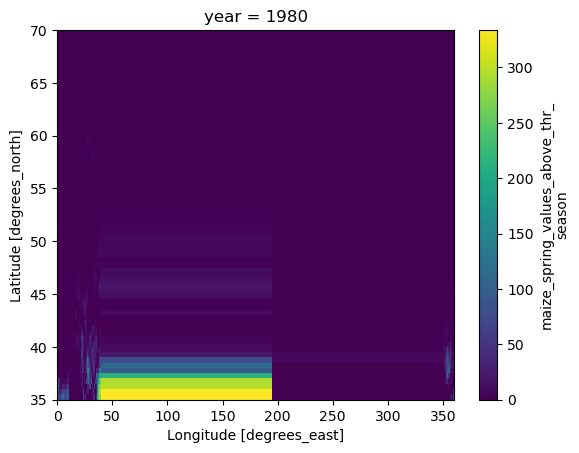

In [11]:
t_annual['maize_spring_values_above_thr_season'].isel(year=0).plot()

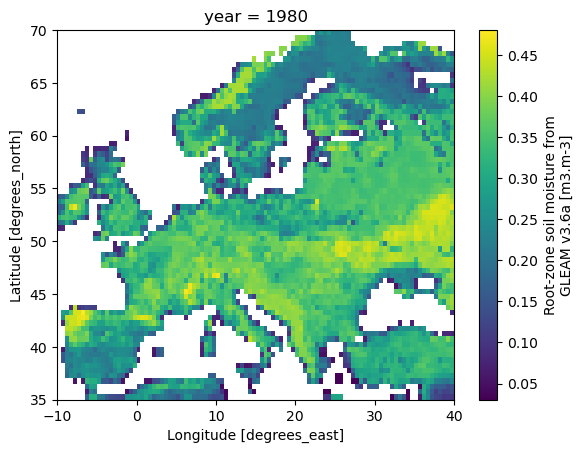

In [12]:
sm_annual['maize_spring_monthly_mean_season'].isel(year=0).plot()